<a href="https://colab.research.google.com/github/Temmy-bit/Basic-Pytorch/blob/main/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
torchvision.__version__

'0.16.0+cu118'

In [2]:
train_data = datasets.FashionMNIST(root = "data",
                                  train = True,
                                  download = True,
                                  transform = torchvision.transforms.ToTensor(),
                                  target_transform=None)

test_data = datasets.FashionMNIST(root = "data",
                                 train = False,
                                 download = True,
                                 transform = ToTensor(),
                                 target_transform=None)

100%|██████████| 26421880/26421880 [00:00<00:00, 126901316.60it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5283831.26it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 62580395.19it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20142049.43it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
train_data.targets.shape,

(torch.Size([60000]),)

In [8]:
image,label = train_data[0]

In [9]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [10]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Ankle boot


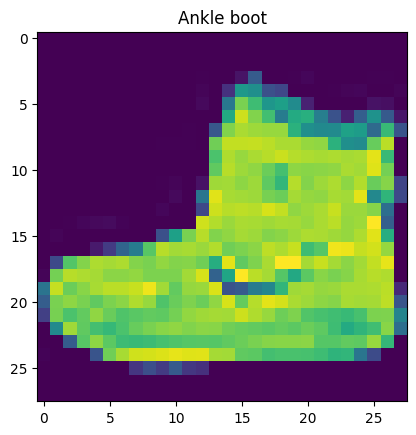

In [11]:
# image = image.permute()
plt.imshow(image.squeeze());
plt.title(class_names[label]);

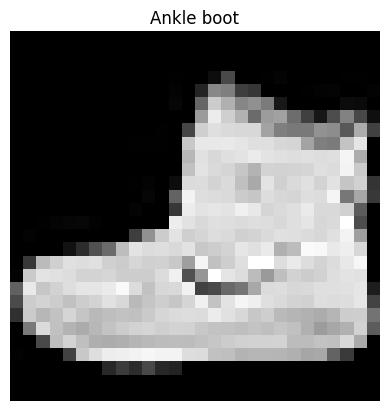

In [12]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

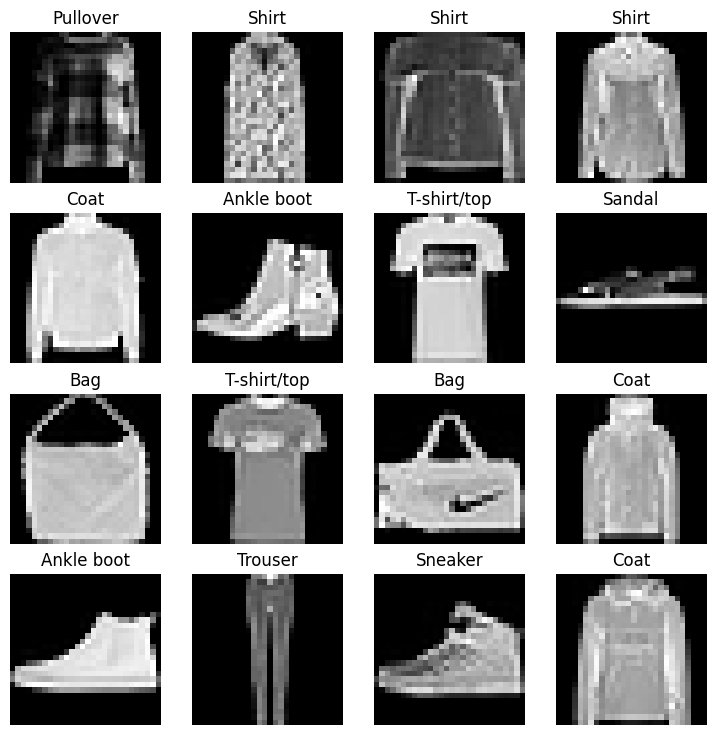

In [13]:
# torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    # print(random_idx)
    img,lab = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray');
    plt.title(class_names[lab]);
    plt.axis(False);

In [14]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (Batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size = BATCH_SIZE,
                            shuffle= False)

In [16]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [17]:
train_features_batch,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

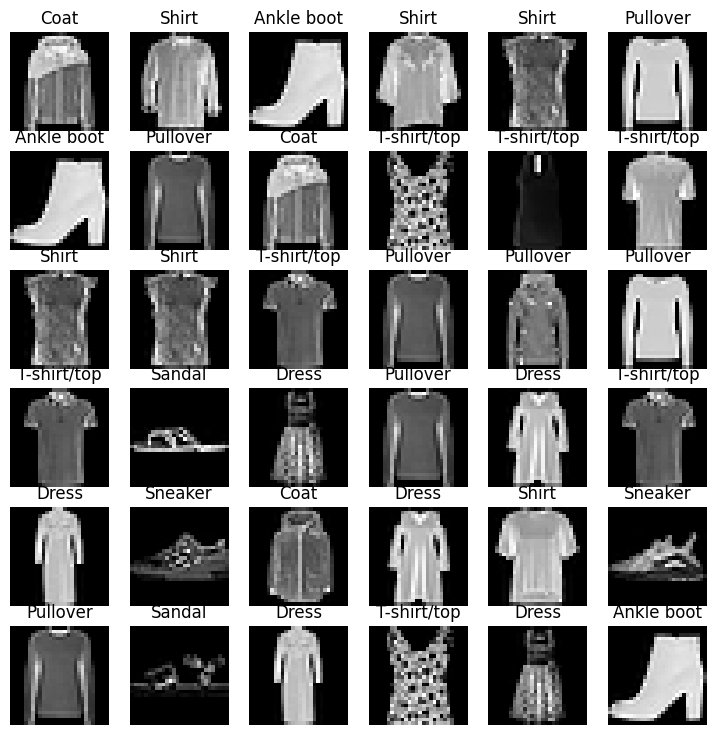

In [18]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows,cols = 6,6
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
    # print(random_idx)
    img,lab = train_features_batch[random_idx],train_label_batch[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray');
    plt.title(class_names[lab]);
    plt.axis(False);

### BaseLine Model

In [19]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"The image size before flatten {x.shape} -> [color_channel, height, width]")
print(f"Image size after flatten {output.shape} -> [color_channel, height*width]")

The image size before flatten torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image size after flatten torch.Size([1, 784]) -> [color_channel, height*width]


In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape : int,
                hidden_units : int,
                output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape
                     )
        )
    def forward(self,x):
        return self.layer_stack(x)


In [21]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [24]:
# def accuracy(target,y_pred):
#     train_acc = torch.sum(y_pred == target)
#     final_train_acc = train_acc/len(y_pred)
#     return final_train_acc

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.1)

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [27]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_loss = 0
#     Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)

#     Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred,y_test)

            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

            test_loss /= len(test_dataloader)

            test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc :.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.0010, Test acc: 0.2803
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.0009, Test acc: 0.3003
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.0011, Test acc: 0.3003
Train time on cpu: 38.014 seconds


In [57]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device = "cpu"):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device),y.to(device)
#             Make Predictions
            y_pred = model(X)

#            Accumulate the loss and acc valus per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred = y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}

#   Calculate model result on the test dataset
model_0_results = eval_model(model = model_0,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [37]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)


In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [50]:
# next(model_1.parameters()).device

In [40]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [41]:
model_1_results = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.3021068572998047,
 'model_acc': 10.75279552715655}

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),lr = 0.1)

In [51]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
            accuracy_fn,
              device: torch.device = device
              ):

    """"Performs a training with model trying to learn on data_loader."""

    model.train()
    # for epoch in tqdm(range(epochs)):
    #     print(f"Epoch: {epoch}\n-----")

    train_loss,train_acc = 0,0
    #     Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y,y_pred.argmax(dim = 1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # if batch % 400 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.3f}")

In [52]:
def test_step(model: torch.nn.Module,
             accuracy_fn,
             loss_fn: torch.nn.Module,
             dataloader: torch.utils.data.dataloader,
             device: torch.device = device):
    """Performs a testing loop step on model going over dataloader"""
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in dataloader:
            X_test,y_test =  X_test.to(device),y_test.to(device)

            test_pred = model(X_test)

            test_loss += loss_fn(test_pred,y_test)

            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

        test_loss /= len(dataloader)

        test_acc /= len(dataloader)

        print(f"Test Loss: {test_loss:.5f} | Test Accuracy {test_acc:.3f}\n")

In [53]:
from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_1,dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(dataloader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn= accuracy_fn)
    train_time_end_on_gpu = timer()
    total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                           end = train_time_end_on_gpu,
                                           device = str(next(model_1.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.06431 | Train Accuracy: 61.865
Test Loss: 0.95876 | Test Accuracy 64.207

Train time on cuda:0: 12.455 seconds
Epoch: 1
-----
Train Loss: 0.87223 | Train Accuracy: 68.070
Test Loss: 0.72209 | Test Accuracy 73.762

Train time on cuda:0: 23.404 seconds
Epoch: 2
-----
Train Loss: 0.66222 | Train Accuracy: 75.875
Test Loss: 0.67080 | Test Accuracy 75.030

Train time on cuda:0: 33.127 seconds
Epoch: 3
-----
Train Loss: 0.55498 | Train Accuracy: 80.197
Test Loss: 0.48348 | Test Accuracy 82.857

Train time on cuda:0: 43.872 seconds
Epoch: 4
-----
Train Loss: 0.43160 | Train Accuracy: 84.828
Test Loss: 0.51552 | Test Accuracy 81.689

Train time on cuda:0: 54.946 seconds


In [ ]:
# train_step(model=model_1,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device,epochs=5)

In [ ]:
test_step(dataloader=test_dataloader,model=model_1,loss_fn=loss_fn,accuracy_fn= accuracy_fn)

In [54]:
model_1_results = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn
                            )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5155242085456848,
 'model_acc': 81.68929712460064}

In [55]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}